In [1]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Helper Functions

In [2]:
def images2ArrayList(sourceFolder, label, howMany):
    '''converts images to arrays and returns them as list'''
    os.chdir(sourceFolder)
    filenames = os.listdir()
    data = []
    labels = [label for i in range(howMany)]
    for i in range(howMany):
        image = Image.open(filenames[i])
        array = np.asarray(image)
        data.append(array)
    return data, labels

def loadTrainTest(root):
    '''loads the dataset'''
    sourceFolder = root + '/200x200/NORMAL'
    normal, normal_label = images2ArrayList(sourceFolder, 0, 1583)
    sourceFolder = root + '/200x200/PNEUMONIA'
    pneumonia, pneumonia_label = images2ArrayList(sourceFolder, 1, 4273)
    images = normal + pneumonia
    label = normal_label + pneumonia_label
    return (np.array(images), np.array(label))

Load The Dataset

In [3]:
root = os.getcwd()

x_train, y_train = loadTrainTest(root)
x_train = x_train / 255   #normalize

Build, compile and train the model

In [4]:
model = tf.keras.models.Sequential([

#--------------------------conv layers--------------------------
    #conv+maxpool: 200x200 => 100x100, 4 filters
    tf.keras.layers.Conv2D(4, 
                           (3, 3), 
                           activation='relu',
                           padding='same',
                           input_shape=(200, 200,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #conv+maxpool: 100x100 => 50x50, 8 filters
    tf.keras.layers.Conv2D(8,
                           (3, 3), 
                           activation='relu',
                           padding='same',
                           input_shape=(100, 100,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #conv+maxpool: 50x50 => 25x25, 16 filters
    tf.keras.layers.Conv2D(16,
                           (3, 3), 
                           activation='relu',
                           padding='same',
                           input_shape=(50, 50,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

#------------------------dense layers-----------------------------------
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.5),
    
    tf.keras.layers.Dense(400, 
                          activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
    tf.keras.layers.Dropout(.5),
    
    tf.keras.layers.Dense(100, 
                        activation='relu', 
                        kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
    tf.keras.layers.Dropout(.5),
    
    tf.keras.layers.Dense(1, activation='sigmoid')

    
])

model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(
        x_train.reshape(len(x_train), 200, 200, 1), y_train, epochs=10)

Epoch 1/10
183/183 [==============================] - 47s 254ms/step - loss: 0.3718 - accuracy: 0.8607 - precision: 0.8689 - recall: 0.9527
Epoch 2/10
183/183 [==============================] - 47s 257ms/step - loss: 0.2230 - accuracy: 0.9331 - precision: 0.9495 - recall: 0.9593
Epoch 3/10
183/183 [==============================] - 48s 261ms/step - loss: 0.2030 - accuracy: 0.9454 - precision: 0.9593 - recall: 0.9661
Epoch 4/10
183/183 [==============================] - 48s 261ms/step - loss: 0.1858 - accuracy: 0.9524 - precision: 0.9627 - recall: 0.9724
Epoch 5/10
183/183 [==============================] - 48s 265ms/step - loss: 0.1870 - accuracy: 0.9527 - precision: 0.9619 - recall: 0.9738
Epoch 6/10
183/183 [==============================] - 48s 262ms/step - loss: 0.1768 - accuracy: 0.9553 - precision: 0.9631 - recall: 0.9761
Epoch 7/10
183/183 [==============================] - 48s 265ms/step - loss: 0.1709 - accuracy: 0.9588 - precision: 0.9662 - recall: 0.9778
Epoch 8/10
183/183 [

Accuracy and loss plot

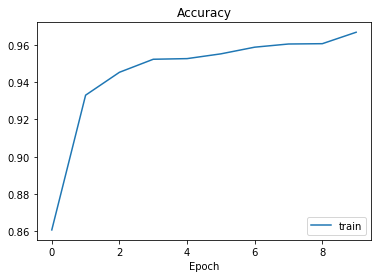

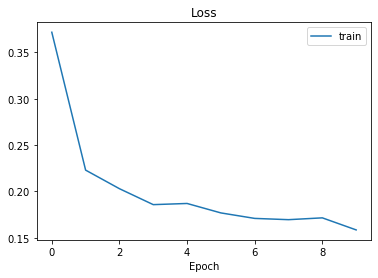

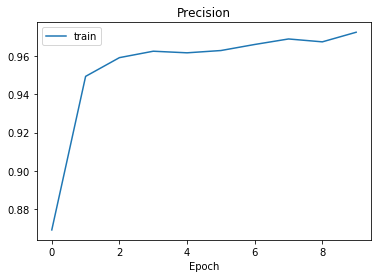

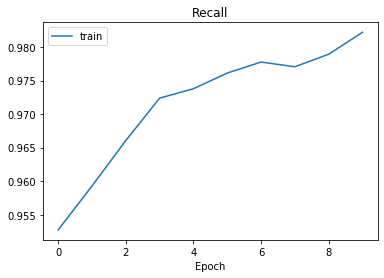

In [5]:
plt.plot(history.history['accuracy'], label='train')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['precision'], label='train')
plt.xlabel('Epoch')
plt.title('Precision')
plt.legend()
plt.show()

plt.plot(history.history['recall'], label='train')
plt.xlabel('Epoch')
plt.title('Recall')
plt.legend()
plt.show()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 4)       40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 8)       296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0

Save model

In [7]:
model.save(root + '/final.h5')